In [15]:
from IPython.display import Image, display

In [18]:
import os
fileDIR=("../outfiles/Pass1/QE_data_GEN3_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")

import ROOT as r
import array

def dxy(rootfile):
    
    # Create a TChain and add the input ROOT file
    chain = r.TChain("Tout")
    chain.Add(rootfile)

    # Create histograms
    h2 = r.TH2F("h2", "dX vs dY", 100, -4, 4, 100, -4, 4)
    h3 = r.TH2F("h3", "dX vs dY 0<W2<1.2", 100, -4, 4, 100, -4, 4)

    # Define variables to hold branch values using arrays
    dx = array.array('d', [0])
    dy = array.array('d', [0])
    W2 = array.array('d', [0])

    # Set branch addresses
    chain.SetBranchStatus("*", 0)
    chain.SetBranchStatus("dx", 1)
    chain.SetBranchStatus("dy", 1)
    chain.SetBranchStatus("W2", 1)
    chain.SetBranchAddress("dx", dx)
    chain.SetBranchAddress("dy", dy)
    chain.SetBranchAddress("W2", W2)

    # Loop over all entries and fill histograms
    nEntries = chain.GetEntries()
    print(nEntries)
    for i in range(nEntries):
        chain.GetEntry(i)
        h2.Fill(dy[0], dx[0])
        if 0 < W2[0] < 1.2:
            h3.Fill(dy[0], dx[0])

    # Write histograms to the file
    h2.Write()
    h3.Write()

    # Create a canvas and save the histogram as an image
    c2 = r.TCanvas("c2", "dX vs dY", 1000, 1000)
    r.gStyle.SetPalette(r.kRainBow)
    h2.Draw("colz")
    c2.SaveAs("../plots/dxdy.png")

    # Create another canvas and save the second histogram as an image
    c3 = r.TCanvas("c3", "dX vs dY 0<W2<1.2", 1000, 1000)
    h3.Draw("colz")
    r.gStyle.SetPalette(r.kRainBow)
    c3.SaveAs("../plots/dxdyCut.png")

    print("it worked")

# Example usage


Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN3_sbs100p_nucleon_np_model2.root
File Exists: True


In [19]:
dxy(fileDIR)

25361701
it worked


Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h2) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h3) has not been written.
Info in <TCanvas::Print>: png file ../plots/dxdy.png has been created
Info in <TCanvas::Print>: png file ../plots/dxdyCut.png has been created


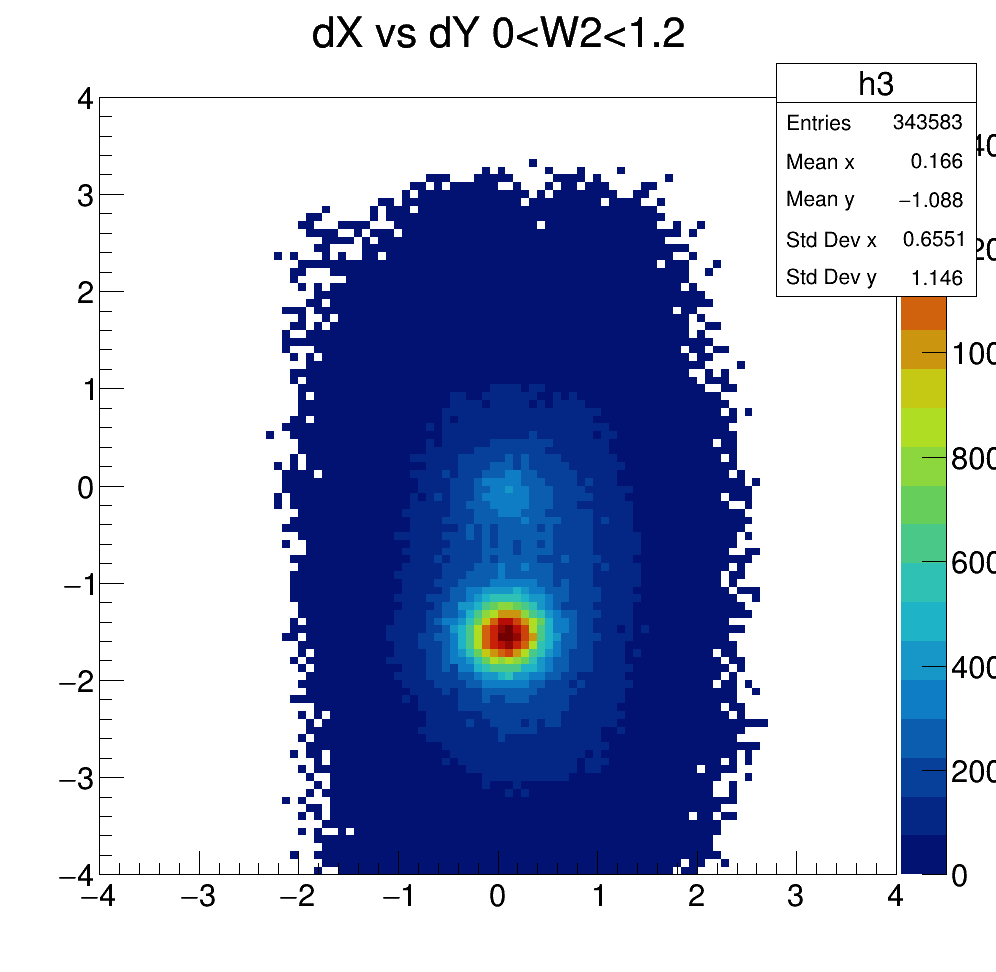

In [20]:
display(Image(filename="../plots/dxdyCut.png"))